In [181]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
class Vec2:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def print(self):
        print(f"X: {self.x}, Y: {self.y}")
    
    @staticmethod
    def distanceBetween(v1, v2) -> float:
        return ((v2.x - v1.x) ** 2 + (v2.y - v1.y) ** 2) ** (1/2)
    
    
class PhysicalObject():
    trajectory = {}
    # position, initial velocity
    def __init__(self, id: str, pos: Vec2, v: Vec2, inertia=1):
        self.initialpos = pos
        self.id = id
        self.trajectory = []
        self.pos = pos
        self.velocity = v
        self.inertia = inertia
    
    def applyForce(self, pos: Vec2, mag: float, dt: float):
        r = Vec2.distanceBetween(self.pos, pos)
        Ax = -1 * mag * (self.pos.x - pos.x) / r ** 3
        Ay = -1 * mag * (self.pos.y - pos.y) / r ** 3     
        # update velocity
        self.velocity.x = self.velocity.x + dt * Ax
        self.velocity.y = self.velocity.y + dt * Ay    
        # update pos. after dt time
        self.pos.x = self.pos.x + self.velocity.x * dt
        self.pos.y = self.pos.y + self.velocity.y * dt
        
        self.trajectory.append(Vec2(self.pos.x, self.pos.y))
        
class CentralForceField:
    # magnitude (const), initial position (const)
    def __init__(self, id: str, mag: float, pos: Vec2):
        self.id = id
        self.pos = pos
        self.mag = mag

class SpaceTime:
    # "center of space", dt
    def __init__(self, pos: Vec2, dt=0.05):
        self.pos = pos
        self.forceFields = []
        self.physicalObjects = []
        self.dt = dt 
    
    def addCentralForceField(self, obj: CentralForceField):
        self.forceFields.append(obj)
        
    def addPhysicalObject(self, obj: PhysicalObject):
        self.physicalObjects.append(obj)
        
    def update(self):
        for forceField in self.forceFields:
            for physicalObject in self.physicalObjects:
                physicalObject.applyForce(forceField.pos, forceField.mag, self.dt)
                # physicalObject.pos.print()
            
    
    def start(self):
        duration = 80
        for i in np.linspace(0, self.dt, duration):
            self.update()

In [183]:
objX = 0.5
objY = 0.0

s = SpaceTime(Vec2(0, 0))
s.addCentralForceField(CentralForceField("field1", 1, Vec2(0,0)))

s.addPhysicalObject(PhysicalObject("obj1", Vec2(objX, objY), Vec2(0, 1.630), 1))
s.start()

x = []
y = []

for pos in s.physicalObjects[0].trajectory:
    x.append(pos.x)
    y.append(pos.y)
    

[(-1.0, 1.0)]

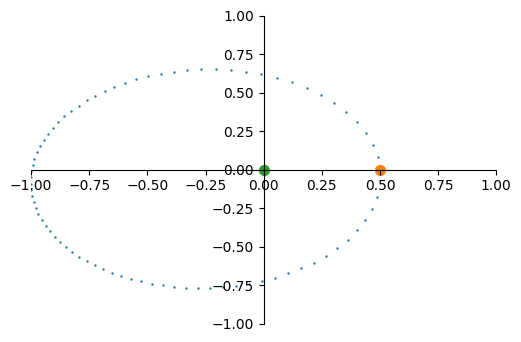

In [184]:


fig, ax = plt.subplots(1, figsize=(6, 4))
ax.scatter(x, y, s=0.5)
ax.scatter([objX], [objY], s=50)
ax.scatter([0], [0], s=50)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set(xlim=(-1, 1))
ax.set(ylim=(-1, 1))